# Incucyte data in R

An example of processing data exported from the incucyte.

In [1]:
library(ggplot2)
library(data.table)

data = fread("./2017-08-22_incucyte_scratchwound_run1.txt")
head(data)

Date Time,Elapsed,B2,C2,D2,E2,F2,G2,B3,C3,⋯,D8,E8,F8,G8,B9,C9,D9,E9,F9,G9
21/07/2017 20:15:00,0,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.00000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00000000
21/07/2017 21:15:00,1,0.1836054,1.551275,0.459505,0.6038039,1.827865,1.651211,1.569840,1.867013,⋯,0.9551282,2.272379,0.08489959,1.014002,1.156346,1.040035,1.080099,1.812395,0,0.03032772
21/07/2017 22:15:00,2,0.6812387,2.164494,1.659247,1.4512220,2.342969,2.950979,2.340970,3.340447,⋯,1.7215270,3.245258,1.09648500,2.045447,2.587253,2.172355,1.689549,2.509036,0,0.25024740
21/07/2017 23:15:00,3,1.0267080,2.431704,1.970063,1.1507950,1.976317,2.966590,2.644510,3.517074,⋯,3.0858240,3.097132,2.17639000,2.741813,3.231814,3.087064,2.957319,3.117211,0,0.89758090
22/07/2017 00:15:00,4,1.3186710,2.838176,2.217085,1.5720130,3.837672,3.091847,3.273848,4.678553,⋯,5.1039400,3.118218,2.14025800,3.268976,4.602396,4.705388,2.161041,2.933783,0,1.89797000
22/07/2017 01:15:00,5,2.4630060,4.041813,2.726006,2.0543070,3.920974,3.731045,3.996303,5.865989,⋯,6.4716790,3.472062,2.89318300,4.116937,5.111100,5.239805,3.624024,3.546317,0,3.02038800


Change `Date Time` column name to `Date_Time`, as gglot2 doesn't like spaces in names.

In [2]:
colnames(data)[1] = "Date_Time"

Change from wide to long format, no need to have a separate column for each well.

In [3]:
df_long = data.table::melt(data, id.vars = c("Date_Time", "Elapsed"),
                           value.name = "RWD", variable.name = "well")
head(df_long)

Warning message in melt.data.table(data, id.vars = c("Date_Time", "Elapsed"), value.name = "RWD", :
“'measure.vars' [B2, C2, D2, E2, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced to. Check DETAILS in ?melt.data.table for more on coercion.”

Date_Time,Elapsed,well,RWD
21/07/2017 20:15:00,0,B2,0.0000000
21/07/2017 21:15:00,1,B2,0.1836054
21/07/2017 22:15:00,2,B2,0.6812387
21/07/2017 23:15:00,3,B2,1.0267080
22/07/2017 00:15:00,4,B2,1.3186710
22/07/2017 01:15:00,5,B2,2.4630060


Split the `well` values into row and column labels, useful in this example as replicates are in pairs of columns.

In [4]:
well_split = strsplit(as.vector(df_long$well), "")
df_long$well_row = sapply(well_split, "[", 1)
df_long$well_col = sapply(well_split, "[", 2)

head(df_long)

Date_Time,Elapsed,well,RWD,well_row,well_col
21/07/2017 20:15:00,0,B2,0.0000000,B,2
21/07/2017 21:15:00,1,B2,0.1836054,B,2
21/07/2017 22:15:00,2,B2,0.6812387,B,2
21/07/2017 23:15:00,3,B2,1.0267080,B,2
22/07/2017 00:15:00,4,B2,1.3186710,B,2
22/07/2017 01:15:00,5,B2,2.4630060,B,2


Match `well_col` values to cell lines labels.

In [5]:
mapping_df = data.frame(well_col = c("2", "3", "4", "5", "6", "7", "8", "9"),
                        cell_line = rep(c("KPL4", "MCF7", "MDA-231", "T47D"), each=2))
head(mapping_df)

well_col,cell_line
2,KPL4
3,KPL4
4,MCF7
5,MCF7
6,MDA-231
7,MDA-231


`geom_smooth()` using method = 'gam'
Warning message:
“Removed 48 rows containing non-finite values (stat_smooth).”

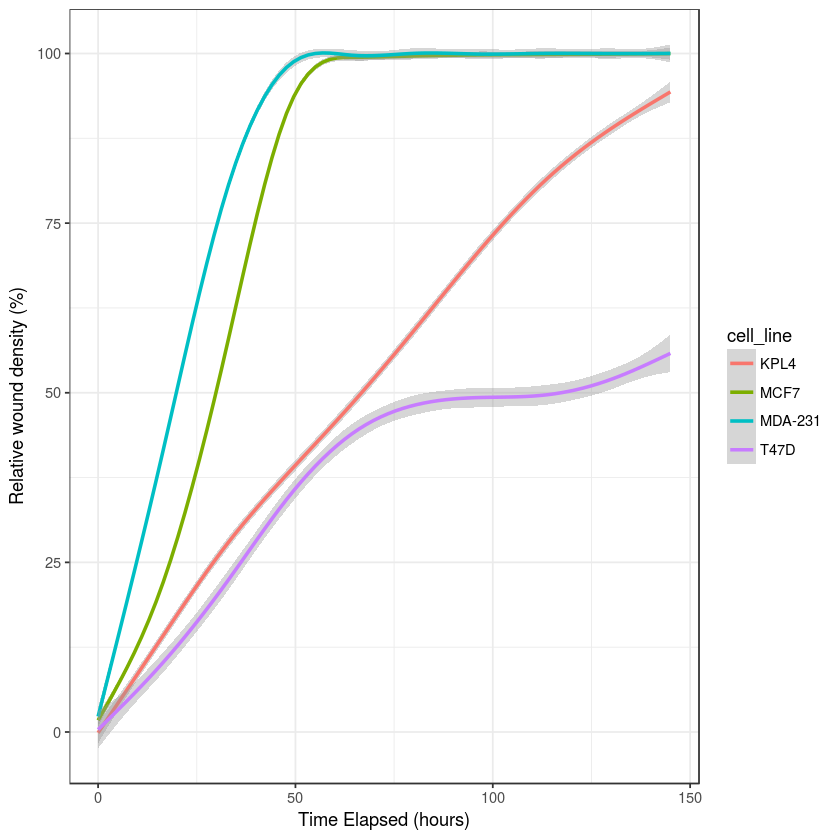

In [6]:
df_long = merge(df_long, mapping_df, by="well_col")

ggplot(df_long) + 
    geom_smooth(aes(Elapsed, RWD, col=cell_line)) + 
    theme_bw() + 
    xlab("Time Elapsed (hours)") + 
    ylab("Relative wound density (%)")